импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

Выгрузим все датасеты

In [2]:
lectures = pd.read_csv('lectures.csv', sep=',')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [3]:
questions = pd.read_csv('questions.csv', sep=',')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [4]:
train = pd.read_csv('train.csv', sep=',')
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Выведем всю информацию полях в датасетах

In [5]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [6]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


Определим пользователей, ответивших правильно на максимальное кол-во вопросов

In [8]:
questions_train = train[train['content_type_id'] == 0]
correct_answers_train = questions_train[questions_train['answered_correctly'] == 1]
most_successful_users = correct_answers_train['user_id'].mode()
most_successful_users

0    2139561972
Name: user_id, dtype: int64

Найдем все вопросы, которые встречались реже всего

In [9]:
counts = train[train['content_type_id'] == 0]['content_id'].value_counts()
counts[counts == counts.min()].index

Index([1484, 1486, 1485, 10033, 5823, 10008, 10007, 10006, 10005], dtype='int64', name='content_id')

Определим частотность всех типов лекции

In [10]:
type_frequency = lectures['type_of'].value_counts() / lectures.shape[0]
percent_type = type_frequency * 100
percent_type_rounded = percent_type.round(decimals=2)
percent_type_rounded

type_of
concept             53.11
solving question    44.50
intention            1.67
starter              0.72
Name: count, dtype: float64

<Axes: ylabel='count'>

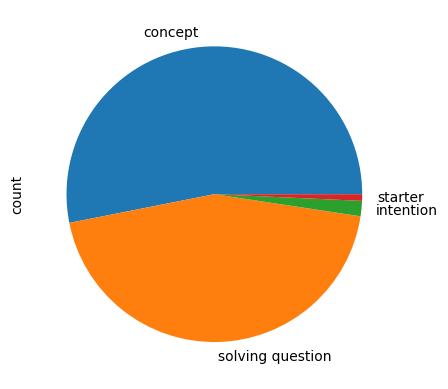

In [11]:
percent_type_rounded.plot.pie()

Построим таблицу с объединением данных о вопросах (questions) и данных о тренировках (train)

In [12]:
train_with_questions = train[train['content_type_id'] == 0].join(questions.set_index('question_id'), on='content_id', validate='m:1')
train_with_questions.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92


In [13]:
train_with_questions

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,1,1,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,3586,0,5,8
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,6341,3,5,60
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,4212,3,5,95
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,6343,0,5,60


In [14]:
train_with_questions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99271300 entries, 0 to 101230331
Data columns (total 14 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  bundle_id                       int64  
 11  correct_answer                  int64  
 12  part                            int64  
 13  tags                            object 
dtypes: float64(1), int64(11), object(2)
memory usage: 11.1+ GB


Выведем топ 5 наборов (bundle) вопросов, в которых было допущено наибольшее число ошибок

In [15]:
incorrect_answers = train_with_questions[train_with_questions['answered_correctly'] == 0]

In [16]:
sorted_bundles = incorrect_answers.groupby('bundle_id')['row_id'].count().sort_values(ascending=False)
sorted_bundles.head(5)
sorted_bundles.name = 'mistakes'

Как видно на графике, на большинство наборов вопросов люди отвечали почти без ошибок

In [17]:
sorted_bundles.mode()

0    3
Name: mistakes, dtype: int64

<Axes: ylabel='Density'>

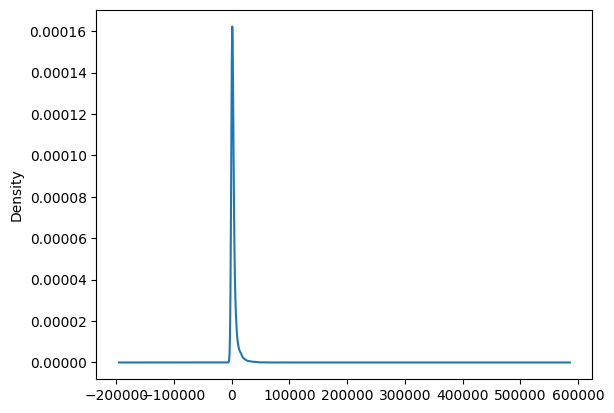

In [18]:
sorted_bundles.plot.kde()

Посчитаем топ 5 наборов вопросов по 95 персентилю по времени ответа

In [19]:
most_time_consuming_bundles = train_with_questions.groupby('bundle_id')['prior_question_elapsed_time'].quantile(.95).sort_values(ascending=False)
most_time_consuming_bundles.head(5)

bundle_id
7566    135320.0
8039    132250.0
7137    127250.0
8109    119750.0
7376    119030.0
Name: prior_question_elapsed_time, dtype: float64

Как видно на графике, в основном люди думают над вопросом около 58 сек

In [20]:
most_time_consuming_bundles.mode()

0    58000.0
Name: prior_question_elapsed_time, dtype: float64

<Axes: ylabel='Density'>

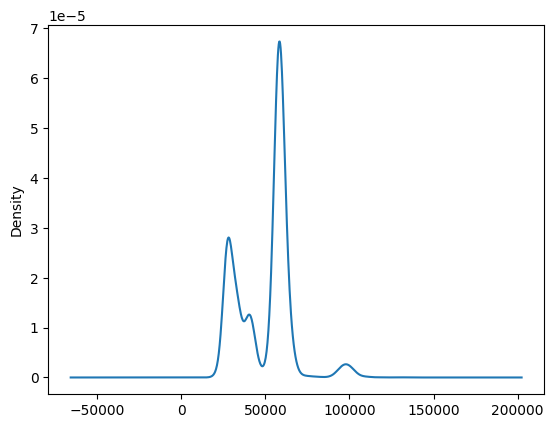

In [21]:
most_time_consuming_bundles.plot.kde()

Соберем предыдущие метрики в отдельный датасет

In [22]:
bundle_df = pd.concat([sorted_bundles, most_time_consuming_bundles], axis=1).fillna(0)
bundle_df['mistakes'] = bundle_df['mistakes'].astype(np.int32)
bundle_df

,mistakes,prior_question_elapsed_time
bundle_id,,
2946,390604,37333.0
7216,352779,61500.0
3363,322658,40666.0
2063,275739,30000.0
2593,246968,32666.0
...,...,...
12615,0,30000.0
3572,0,28800.0
12809,0,28650.0


Посчитаем, сколько студентов ответили на 99% вопросов верно

In [23]:
success_questions_99 = train_with_questions.groupby('user_id')['answered_correctly'].filter(lambda x: x.sum() / x.size > 0.99)

In [24]:
success_questions_99.size

3369

Посчитаем, как часто отвечают на вопросы с объяснениями и без

In [25]:
explanation_analysis = train_with_questions.groupby('prior_question_had_explanation')['answered_correctly'].sum()
explanation_analysis

prior_question_had_explanation
False     4602399
True     60375288
Name: answered_correctly, dtype: int64

<Axes: xlabel='prior_question_had_explanation'>

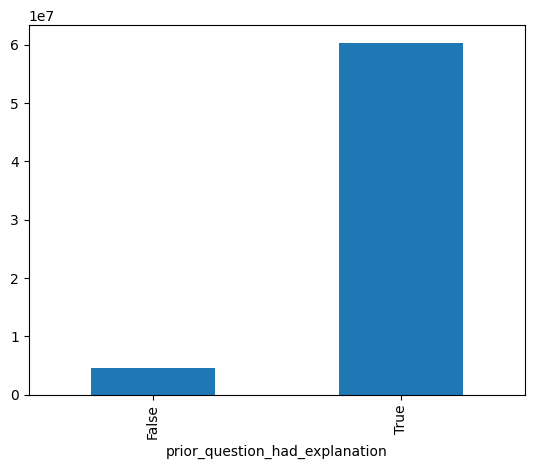

In [26]:
explanation_analysis.plot.bar()

In [27]:
success_questions_99.size

3369

Посчитаем, как часто отвечают на вопросы с объяснениями и без

In [28]:
explanation_analysis = train_with_questions.groupby('prior_question_had_explanation')['answered_correctly'].sum()
explanation_analysis

prior_question_had_explanation
False     4602399
True     60375288
Name: answered_correctly, dtype: int64

<Axes: xlabel='prior_question_had_explanation'>

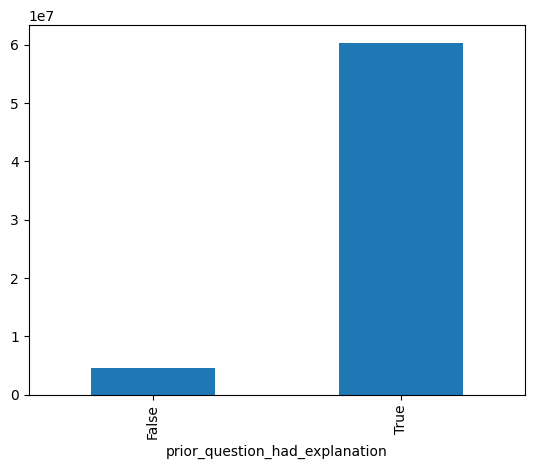

In [29]:
explanation_analysis.plot.bar()